# Classificação

## Treinamento

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X = iris.data[:, 2:]  # comprimento e largura da pétala
y = iris.target

tree = DecisionTreeClassifier(max_depth=3)

In [3]:
tree.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Plotagem

In [4]:
from sklearn.tree import export_graphviz

fname = 'iris-dt-classifier.dot'

export_graphviz(
    tree,
    out_file=fname,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [5]:
!dot -Tpng iris-dt-classifier.dot -o iris-dt-classifier.png

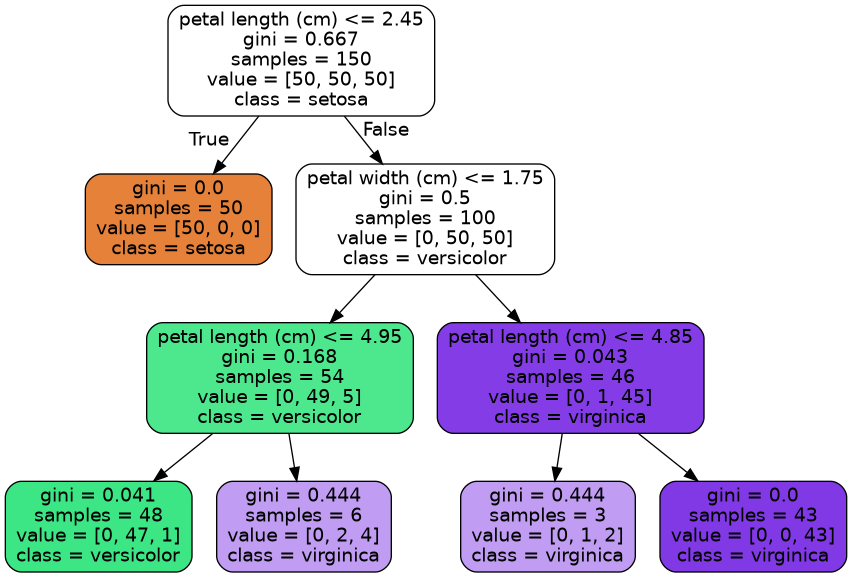

In [6]:
from IPython.display import display, Image as IPImage
display(IPImage(fname[:-3] + 'png'))

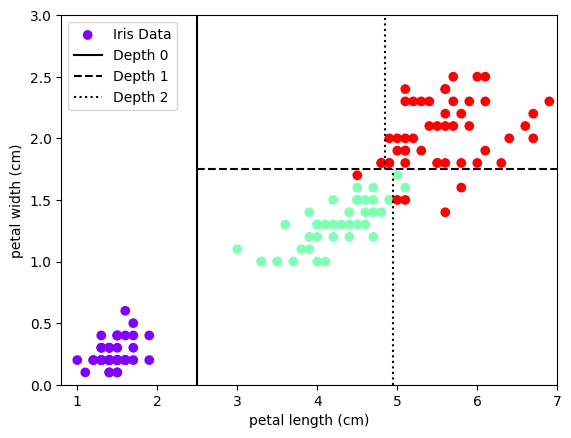

In [7]:
import matplotlib.pyplot as plt

def plot_tree_boundaries():
    plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', label='Iris Data')
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.xlim(0.8, 7)
    plt.ylim(0, 3)
    plt.plot([2.5, 2.5], [0, 3], 'k-', label='Depth 0')
    plt.plot([2.5, 7], [1.75, 1.75], 'k--', label='Depth 1')
    plt.plot([4.95, 4.95], [0, 1.75], 'k:', label='Depth 2')
    plt.plot([4.85, 4.85], [1.75, 3], 'k:')
    plt.legend()
    plt.show()

plot_tree_boundaries()

## Probabilidades

In [8]:
tree.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [9]:
pred = tree.predict([[5, 1.5]])
pred

array([2])

In [10]:
iris.target_names[pred].item()

'virginica'

# Regressão

In [11]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [12]:
reg = DecisionTreeRegressor(max_depth=2, random_state=42)

In [13]:
X = np.random.rand(100) * 2 - 1
y = X ** 2 + np.random.rand(100)

X = X.reshape(-1, 1)

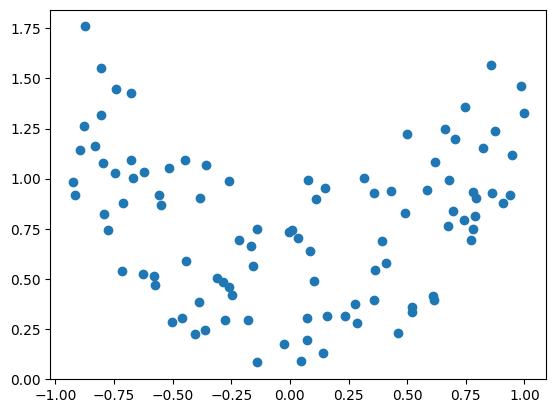

In [14]:
plt.scatter(X, y)

In [15]:
reg.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [16]:
fname = 'iris-dt-regressor.dot'

export_graphviz(
    reg,
    out_file=fname,
    feature_names=['X'],
    filled=True,
    rounded=True
)


In [17]:
!dot -Tpng iris-dt-regressor.dot -o iris-dt-regressor.png

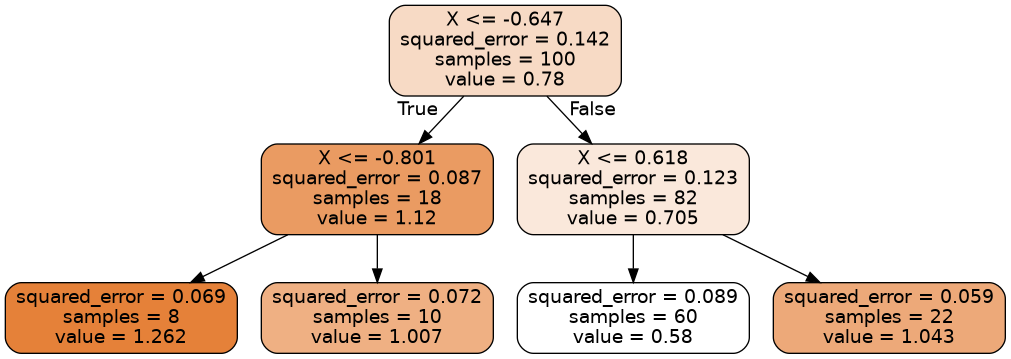

In [18]:
from IPython.display import display, Image as IPImage
display(IPImage(fname[:-3] + 'png'))

In [19]:
print(reg.tree_.threshold)

t0 = reg.tree_.threshold[0]
t1 = reg.tree_.threshold[1]
t2 = reg.tree_.threshold[4]

[-0.64685178 -0.8012723  -2.         -2.          0.61837435 -2.
 -2.        ]


In [20]:
values = reg.tree_.value.ravel()
values

array([0.77950691, 1.12033139, 1.26226067, 1.00678796, 0.70469178,
       0.58048386, 1.04344066])

In [21]:
v0 = values[2]
v1 = values[3]
v2 = values[5]
v3 = values[6]

In [22]:
def plot_regressor_boundaries():
    plt.scatter(X, y, c='k')
    plt.xlim(-1.1, 1.1)
    plt.ylim(0, 2)
    
    for i, t in enumerate([t0, t1, t2]):
        plt.axvline(t, c='gray', ls='--', )
        plt.text(t + 0.05, 0.1, f't{i}', c='gray', fontdict={'fontsize': 12})

    plt.plot([-2, t1], [v0, v0], c='r')
    plt.plot([t1, t1], [v0, v1], c='r')
    plt.plot([t1, t0], [v1, v1], c='r')
    plt.plot([t0, t0], [v1, v2], c='r')
    plt.plot([t0, t2], [v2, v2], c='r')
    plt.plot([t2, t2], [v2, v3], c='r')
    plt.plot([t2, 2], [v3, v3], c='r')

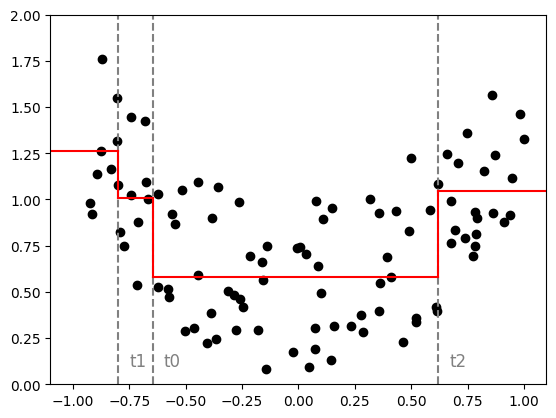

In [23]:
plot_regressor_boundaries()